# ДЗ урок 7 Работа с переменными

Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

Переменная, которую надо предсказать - ’MEDV’.

Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [549]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore") 

data = pd.read_csv(load_boston()['filename'], skiprows=1)

Сохраним данные для сравнения качества модели

In [550]:
X0 = data.drop(['MEDV'],axis = 1)

In [551]:
y0 = data['MEDV']

Строим линейную регрессию 

In [552]:
def Linregression(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
    model = linear_model.LinearRegression()
    model.fit( X_train, y_train )
    predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    
    return predictions, y_test, score

In [553]:
predictions0, y_test0, score0 = Linregression(X0, y0)

Оценка качества модели по исходным данным

In [554]:
mse0 = mean_squared_error(y_test0, predictions0)
sqrt_mse0 = np.sqrt(mse0)

print('MSE:     ',mse0)
print('SQRT MSE:',sqrt_mse0)
print('Score:   ',score0)

MSE:      23.03881286628351
SQRT MSE: 4.7998763386449355
Score:    0.7330247212691934


### Преобразование переменных

In [555]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [556]:
X1 = data.drop(['MEDV'],axis = 1)

In [557]:
X1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [558]:
X1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D77FF0C548>,
      dtype=object)

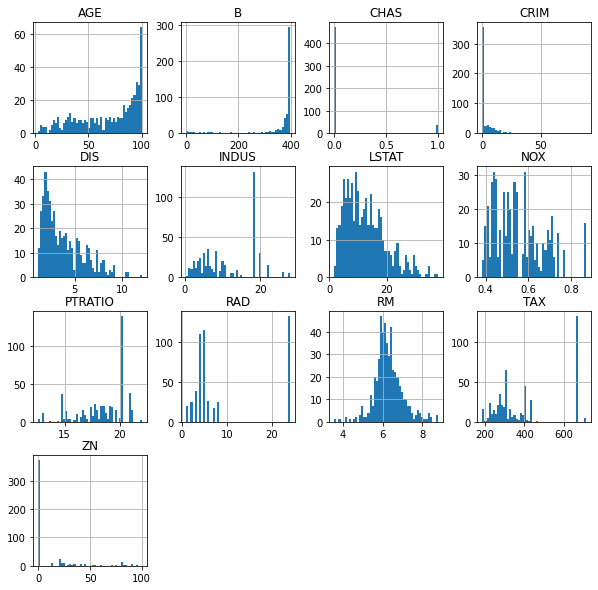

In [559]:
X1.hist(bins=50,figsize=[10,10])

#### CRIM

In [560]:
#X1['CRIM'].value_counts()

In [561]:
# находим выбросы и ограничиваем их значением 95%квантилем
X1.loc[:,'CRIM'].describe(percentiles=[0.1,0.8,0.95])

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
10%        0.038195
50%        0.256510
80%        5.581070
95%       15.789150
max       88.976200
Name: CRIM, dtype: float64

In [562]:
X1.loc[:,'CRIM_new'] = X1.loc[:,'CRIM'].where(X1.loc[:,'CRIM']<=8)  
X1['CRIM_new'] = X1['CRIM_new'].fillna(8)

In [563]:
X1.loc[:,'CRIM_new'].describe(percentiles=[0.1,0.8,0.95])

count    506.000000
mean       2.076518
std        3.013649
min        0.006320
10%        0.038195
50%        0.256510
80%        5.581070
95%        8.000000
max        8.000000
Name: CRIM_new, dtype: float64

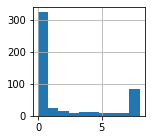

In [564]:
X1['CRIM_new'].hist(figsize=(2,2))

In [565]:
# для сравнения просто округлим текущие значения 
X1['CRIM_low'] = np.ceil(X1['CRIM']).astype(int)

#### AGE, доля жилых домов, построенных до 1940 г
разобьем на группы 

In [566]:
#X1.loc[:,'AGE'].value_counts()

In [567]:
#X1['AGE'].hist(figsize=(2,2))

In [568]:
X1['AGE_cat'] = pd.cut(X1['AGE'], bins=[0,10,20,40,60,70,100], labels=['10','20','40','60','70','100'])
X1.loc[:,'AGE_cat'] =X1.loc[:,'AGE_cat'].astype(int)

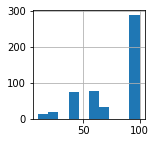

In [569]:
X1['AGE_cat'].hist(figsize=(2,2))

In [570]:
X1['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

#### ZN доля земли под жилую застройку зонирована на участки площадью более 25 000 кв. Футов.
создадим новую переменнную, которая будет показывать,что в районе нет крупной застройки

372 случаях процент больших участков = 0,для таких случаев новой переменной присваиваем 1, остальное заполняем 0

In [571]:
#X1['ZN'].hist(figsize=(2,2))

In [572]:
#X1['ZN'].value_counts().head()

In [573]:
X1.loc[:,'Small_lots'] = X1[X1.loc[:,'ZN'] == 0]['ZN']+1  
X1['Small_lots'] = X1['Small_lots'].fillna(0)

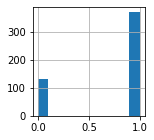

In [574]:
X1['Small_lots'].hist(figsize=(2,2))

In [575]:
X1['Small_lots'].value_counts()

1.0    372
0.0    134
Name: Small_lots, dtype: int64

создадим еще один признак, прологарифмируем значение переменной

In [576]:
X1['ZN_log'] = (X1['ZN']+1).transform(np.log)

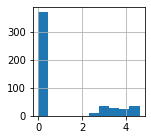

In [577]:
X1['ZN_log'].hist(figsize=(2,2))

In [578]:
#X1['ZN_log'].value_counts()

а для этого признака разобьем на равномерные группы

In [579]:
X1['ZN_cat'] = (np.floor(X1['ZN']/10)).astype(int) 

In [580]:
X1['ZN_cat'].value_counts()

0     372
2      48
8      19
3      16
4      13
1      12
9       9
7       6
5       6
6       4
10      1
Name: ZN_cat, dtype: int64

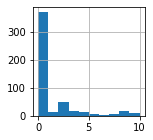

In [581]:
X1['ZN_cat'].hist(figsize=(2,2))

#### INDUS proportion of non-retail business acres per town

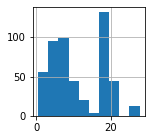

In [582]:
X1['INDUS'].hist(figsize=(2,2))

In [583]:
#X1['INDUS'].value_counts()

In [584]:
#понизим размерность, таким образом разобьем на группы
X1['INDUS_cat'] = (np.floor(X1['INDUS'])/5).astype(int) 

In [585]:
X1['INDUS_cat'].value_counts()

3    165
1    150
0    120
2     44
4     15
5     12
Name: INDUS_cat, dtype: int64

#### DIS weighted distances to five Boston employment centres
сократим точность расстояния

In [586]:
X1['DIS'].value_counts()

3.4952    5
5.2873    4
5.4007    4
5.7209    4
6.8147    4
         ..
1.7659    1
4.4534    1
2.1000    1
4.0905    1
1.8125    1
Name: DIS, Length: 412, dtype: int64

In [587]:
#X1['DIS'].hist(figsize=(2,2))

In [588]:
X1['DIS_cat'] = np.ceil(X1['DIS']).astype(int)

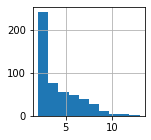

In [589]:
X1['DIS_cat'].hist(figsize=(2,2))


сделаем еще одну переменную - разобъем на категории

In [590]:
X1['DIS_bin'] = pd.cut(X1['DIS'], bins=[0,4,6,8,20], labels=['2','4','6','12'])
X1.loc[:,'DIS_bin'] =X1.loc[:,'DIS_bin'].astype(int)

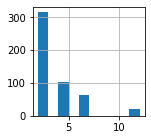

In [591]:
X1['DIS_bin'].hist(figsize=(2,2))

In [592]:
X1['DIS_bin'].describe()  #проверим тип и размерность, чтобы убедиться что все наблюдения попали в категории 

count    506.000000
mean       3.355731
std        2.321645
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       12.000000
Name: DIS_bin, dtype: float64

#### CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
построим матрицу корреляции для признаков, видим, что переменная плохо коррелирует с целевым значением, удаляем

In [593]:
corr_matrix = data.corr() 
corr_matrix['MEDV'].sort_values(ascending=True)   #корреляция всех переменных с целевым значением

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [594]:
X1['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

#### NOX      nitric oxides concentration (parts per 10 million)

In [595]:
X1['NOX'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

In [596]:
# стандартизация 
X1['NOX_std'] = (X1['NOX'] - X1['NOX'].mean()) / X1['NOX'].std()

In [597]:
X1['NOX_std'].describe()

count    5.060000e+02
mean     3.167427e-15
std      1.000000e+00
min     -1.464433e+00
25%     -9.121262e-01
50%     -1.440749e-01
75%      5.980871e-01
max      2.729645e+00
Name: NOX_std, dtype: float64

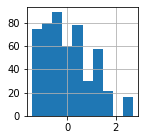

In [598]:
X1['NOX_std'].hist(figsize=(2,2))

In [599]:
X1['NOX_cat'] = np.round(X1['NOX']*100)

In [600]:
#X1['NOX_cat'].hist(figsize=(2,2))

In [601]:
X1['NOX_cat2'] = np.round(np.round(X1['NOX']*100)/10)

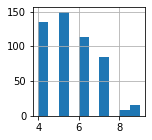

In [602]:
X1['NOX_cat2'] = X1['NOX_cat2'].astype(int)
X1['NOX_cat2'].hist(figsize=(2,2))

#### RM       average number of rooms per dwelling
округляем значение

In [603]:
#X1['RM'].hist(figsize=(2,2))

In [604]:
X1.loc[:,'RM_r'] = np.round(X1.loc[:,'RM'])
X1['RM_r'] = X1['RM_r'].astype(int)

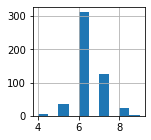

In [605]:
X1['RM_r'].hist(figsize=(2,2))

#### RAD      index of accessibility to radial highways
#### TAX      full-value property-tax rate per $10,000


In [606]:
X1.query('RAD == 24 and TAX != 666')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,Small_lots,ZN_log,ZN_cat,INDUS_cat,DIS_cat,DIS_bin,NOX_std,NOX_cat,NOX_cat2,RM_r


переменные TAX и RAD  коррелируют для домов за городом, создаем новый признак - за городом, а существующие признаки будем применять только для домов в черте города

In [607]:
X1.loc[:,'outoftown'] = X1['RAD'].isin([24]) 
X1['outoftown'] = X1['outoftown'].astype(int)

In [608]:
X1['outoftown'].value_counts()

0    374
1    132
Name: outoftown, dtype: int64

 существующие признаки будем применять только для домов в черте города

In [609]:
X1.loc[:,'RAD_intown'] =  X1[X1.loc[:,'outoftown'] != 1]['RAD']
X1['RAD_intown'] = X1['RAD_intown'].fillna(0)

In [610]:
X1.loc[:,'RAD_intown'].value_counts()

0.0    132
5.0    115
4.0    110
3.0     38
6.0     26
8.0     24
2.0     24
1.0     20
7.0     17
Name: RAD_intown, dtype: int64

In [611]:
X1['TAX_new'] = np.ceil( X1['TAX'] / 100).astype(int)

In [612]:
X1['TAX_new'].value_counts()

3    155
4    134
7    132
5     63
2     17
8      5
Name: TAX_new, dtype: int64

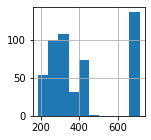

In [613]:
X1['TAX'].hist(figsize=(2,2))

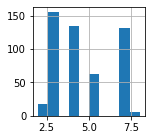

In [614]:
X1['TAX_new'].hist(figsize=(2,2))

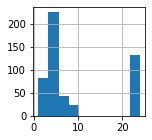

In [615]:
X1['RAD'].hist(figsize=(2,2))

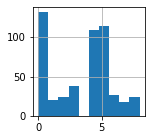

In [616]:
X1['RAD_intown'].hist(figsize=(2,2))

Создадим dummy переменные для RAD

In [617]:
dum = pd.get_dummies(X1['RAD'], prefix = 'RAD_')

In [618]:
X1 = pd.concat([X1, dum], axis = 1)

In [619]:
X1['TAX_log'] = (X1['TAX']+1).transform(np.log)

In [620]:
X1['PRICE'] = np.round(X1['TAX']*10000).astype(int)


#### PTRATIO  pupil-teacher ratio by town

In [621]:
#X1['PTRATIO'].hist(figsize=(2,2))

In [622]:
X1['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [623]:
X1['PTRATIO_normalized'] = (X1['PTRATIO'] - X1['PTRATIO'].min()) / (X1['PTRATIO'].max() - X1['PTRATIO'].min())

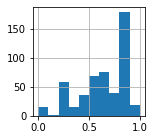

In [624]:
X1['PTRATIO_normalized'].hist(figsize=(2,2))

In [625]:
X1['PTRATIO_cat'] = np.ceil(X1['PTRATIO']/2)

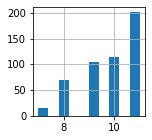

In [626]:
X1['PTRATIO_cat'].hist(figsize=(2,2))

In [627]:
#X1['PTRATIO_cat'].value_counts()

#### B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

In [628]:
X1['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

In [629]:
X1['B_log'] = (X1['B']+1).transform(np.log)

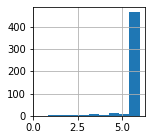

In [630]:
X1['B_log'].hist(figsize=(2,2))

In [631]:
X1['B_log'].describe()

count    506.000000
mean       5.759511
std        0.729424
min        0.277632
25%        5.930593
50%        5.972384
75%        5.984503
max        5.986201
Name: B_log, dtype: float64

#### LSTAT    % lower status of the population

In [632]:
X1['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

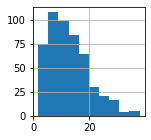

In [633]:
X1['LSTAT'].hist(figsize=(2,2))

In [634]:
X1['LSTAT_log'] = (X1['LSTAT']+1).transform(np.log)

In [635]:
X1['LSTAT_log'].describe()

count    506.000000
mean       2.475610
std        0.539033
min        1.004302
25%        2.073162
50%        2.514464
75%        2.887869
max        3.662792
Name: LSTAT_log, dtype: float64

### Проверка моделей на разных наборах данных

после прообразований признаков получили следующий набор данных:

In [636]:
y1 = data['MEDV']

In [637]:
X1.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CRIM                506 non-null    float64
 1   ZN                  506 non-null    float64
 2   INDUS               506 non-null    float64
 3   CHAS                506 non-null    int64  
 4   NOX                 506 non-null    float64
 5   RM                  506 non-null    float64
 6   AGE                 506 non-null    float64
 7   DIS                 506 non-null    float64
 8   RAD                 506 non-null    int64  
 9   TAX                 506 non-null    int64  
 10  PTRATIO             506 non-null    float64
 11  B                   506 non-null    float64
 12  LSTAT               506 non-null    float64
 13  CRIM_new            506 non-null    float64
 14  CRIM_low            506 non-null    int32  
 15  AGE_cat             506 non-null    int32  
 16  Small_lo

построим линейную регрессию по все признакам

In [638]:
X2 = X1

In [639]:
predictions2, y_test2, score2 = Linregression(X2, y1)
mse2 = mean_squared_error(y_test2, predictions2)
sqrt_mse2 = np.sqrt(mse2)

пробуем разные наборы признаков для оценки качества модели

In [640]:
#X2.info()

оставим только нормализованные и категорированные переменные

In [641]:
X3 = X1.drop(['CRIM_new','CRIM','RM_r', 'Small_lots', 'INDUS',
              'CHAS','RAD','NOX', 'AGE','TAX','DIS_bin',
              'PTRATIO','B','DIS','NOX_std','NOX_cat',
              'ZN_log','ZN','LSTAT','TAX_log',
              'RAD_intown','RAD__1','RAD__2','RAD__3','RAD__4',
              'RAD__5','RAD__6','RAD__7','RAD__8','RAD__24','outoftown', #можно вернуть
              'PTRATIO_normalized' ],axis = 1)

In [642]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RM           506 non-null    float64
 1   CRIM_low     506 non-null    int32  
 2   AGE_cat      506 non-null    int32  
 3   ZN_cat       506 non-null    int32  
 4   INDUS_cat    506 non-null    int32  
 5   DIS_cat      506 non-null    int32  
 6   NOX_cat2     506 non-null    int32  
 7   TAX_new      506 non-null    int32  
 8   PRICE        506 non-null    int32  
 9   PTRATIO_cat  506 non-null    float64
 10  B_log        506 non-null    float64
 11  LSTAT_log    506 non-null    float64
dtypes: float64(4), int32(8)
memory usage: 31.8 KB


In [643]:
predictions3, y_test3, score3 = Linregression(X3, y1)
mse3 = mean_squared_error(y_test3, predictions3)
sqrt_mse3 = np.sqrt(mse3)

In [644]:
X4 = X1.drop(['CRIM', 'CRIM_new','RM_r','CHAS','RAD','NOX', 
              'AGE','TAX','DIS_bin',
              'PTRATIO','B','DIS','NOX_std','NOX_cat','ZN_log',
              'outoftown','TAX_new', 
              'PTRATIO_normalized' ],axis = 1)

In [645]:
X4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ZN           506 non-null    float64
 1   INDUS        506 non-null    float64
 2   RM           506 non-null    float64
 3   LSTAT        506 non-null    float64
 4   CRIM_low     506 non-null    int32  
 5   AGE_cat      506 non-null    int32  
 6   Small_lots   506 non-null    float64
 7   ZN_cat       506 non-null    int32  
 8   INDUS_cat    506 non-null    int32  
 9   DIS_cat      506 non-null    int32  
 10  NOX_cat2     506 non-null    int32  
 11  RAD_intown   506 non-null    float64
 12  RAD__1       506 non-null    uint8  
 13  RAD__2       506 non-null    uint8  
 14  RAD__3       506 non-null    uint8  
 15  RAD__4       506 non-null    uint8  
 16  RAD__5       506 non-null    uint8  
 17  RAD__6       506 non-null    uint8  
 18  RAD__7       506 non-null    uint8  
 19  RAD__8  

In [646]:
predictions4, y_test4, score4 = Linregression(X4, y1)
mse4 = mean_squared_error(y_test4, predictions4)
sqrt_mse4 = np.sqrt(mse4)

In [647]:
X5 = X1.drop(['ZN','CRIM_new','CRIM','RM', 'Small_lots', 'INDUS', 
              'CHAS','RAD','NOX', 'AGE','TAX','TAX_log','DIS_bin',
              'PTRATIO','B','DIS','NOX_std','NOX_cat2','ZN_log',
              'RAD_intown','RAD__1','RAD__2','RAD__3','RAD__4',
              'RAD__5','RAD__6','RAD__7','RAD__8','RAD__24','TAX_new',
              'PTRATIO_normalized' ],axis = 1)

In [648]:
X5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LSTAT        506 non-null    float64
 1   CRIM_low     506 non-null    int32  
 2   AGE_cat      506 non-null    int32  
 3   ZN_cat       506 non-null    int32  
 4   INDUS_cat    506 non-null    int32  
 5   DIS_cat      506 non-null    int32  
 6   NOX_cat      506 non-null    float64
 7   RM_r         506 non-null    int32  
 8   outoftown    506 non-null    int32  
 9   PRICE        506 non-null    int32  
 10  PTRATIO_cat  506 non-null    float64
 11  B_log        506 non-null    float64
 12  LSTAT_log    506 non-null    float64
dtypes: float64(5), int32(8)
memory usage: 35.7 KB


In [649]:
predictions5, y_test5, score5 = Linregression(X5, y1)
mse5 = mean_squared_error(y_test5, predictions5)
sqrt_mse5 = np.sqrt(mse5)

In [650]:
X6 = X1.drop(['CRIM_new','CRIM','RM_r', 'Small_lots', 'INDUS',
              'CHAS','RAD','NOX', 'AGE','TAX','DIS_bin','B_log','RM','TAX_new',
              'PTRATIO','B','DIS','NOX_std','NOX_cat',
              'ZN_log','ZN','LSTAT','TAX_log',
              'RAD_intown','RAD__1','RAD__2','RAD__3','RAD__4',
              'RAD__5','RAD__6','RAD__7','RAD__8','RAD__24','outoftown', #можно вернуть
              'PTRATIO_normalized'],axis = 1)

In [651]:
X6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM_low     506 non-null    int32  
 1   AGE_cat      506 non-null    int32  
 2   ZN_cat       506 non-null    int32  
 3   INDUS_cat    506 non-null    int32  
 4   DIS_cat      506 non-null    int32  
 5   NOX_cat2     506 non-null    int32  
 6   PRICE        506 non-null    int32  
 7   PTRATIO_cat  506 non-null    float64
 8   LSTAT_log    506 non-null    float64
dtypes: float64(2), int32(7)
memory usage: 21.9 KB


In [652]:
predictions6, y_test6, score6 = Linregression(X6, y1)
mse6 = mean_squared_error(y_test6, predictions6)
sqrt_mse6 = np.sqrt(mse6)

### наилучший набор признаков 

    - 0   LSTAT            float64   исходный 
    - 1   CRIM_low         int32     округление
    - 2   AGE_cat          int32     ручные категории
    - 3   ZN_cat           int32     округление и категории по десяткам %
    - 4   INDUS_cat        int32     округление
    - 5   DIS_cat          int32     округление
    - 6   NOX_cat          float64   ручные категории
    - 7   RM_r             int32     до целого 
    - 8   outoftown        int32     новый признак за  городом или нет
    - 9   PRICE            int32     цена от налога
    - 10  PTRATIO_cat      float64   ручные категории
    - 11  B_log            float64   логарифмированный
    - 12  LSTAT_log        float64   логарифмированный

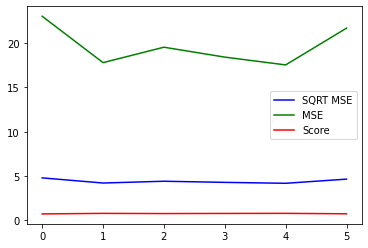

In [653]:
# изменение оценок в зависимости от порога
plt.plot([sqrt_mse0,sqrt_mse2,sqrt_mse3,sqrt_mse4,sqrt_mse5,sqrt_mse6],'b',label="SQRT MSE")
plt.plot([mse0,mse2,mse3,mse4,mse5,mse6], 'g',label="MSE")
plt.plot([score0,score2,score3,score4,score5,score6],'r',label="Score")

plt.legend(loc="center center")
plt.show()

In [654]:
print('Модель 0')
print('MSE: ',mse0)
print('SQRT MSE:',sqrt_mse0)
print('Score:',score0)
print('Модель 2')
print('MSE: ',mse2)
print('SQRT MSE:',sqrt_mse2)
print('Score:',score2)
print('Модель 3')
print('MSE: ',mse3)
print('SQRT MSE:',sqrt_mse3)
print('Score:',score3)
print('Модель 4')
print('MSE: ',mse4)
print('SQRT MSE:',sqrt_mse4)
print('Score:',score4)
print('Модель 5')
print('MSE: ',mse5)
print('SQRT MSE:',sqrt_mse5)
print('Score:',score5)
print('Модель 6')
print('MSE: ',mse6)
print('SQRT MSE:',sqrt_mse6)
print('Score:',score6)

Модель 0
MSE:  23.03881286628351
SQRT MSE: 4.7998763386449355
Score: 0.7330247212691934
Модель 2
MSE:  17.804805426720872
SQRT MSE: 4.219574081198346
Score: 0.793676743713515
Модель 3
MSE:  19.545258319342107
SQRT MSE: 4.421001958758004
Score: 0.7735082611262283
Модель 4
MSE:  18.42596593742441
SQRT MSE: 4.29254772104218
Score: 0.7864786948624676
Модель 5
MSE:  17.547048293890455
SQRT MSE: 4.1889197048750475
Score: 0.796663650321145
Модель 6
MSE:  21.696300200047386
SQRT MSE: 4.657928745703114
Score: 0.7485818463410567


In [655]:
from pandas.plotting import scatter_matrix

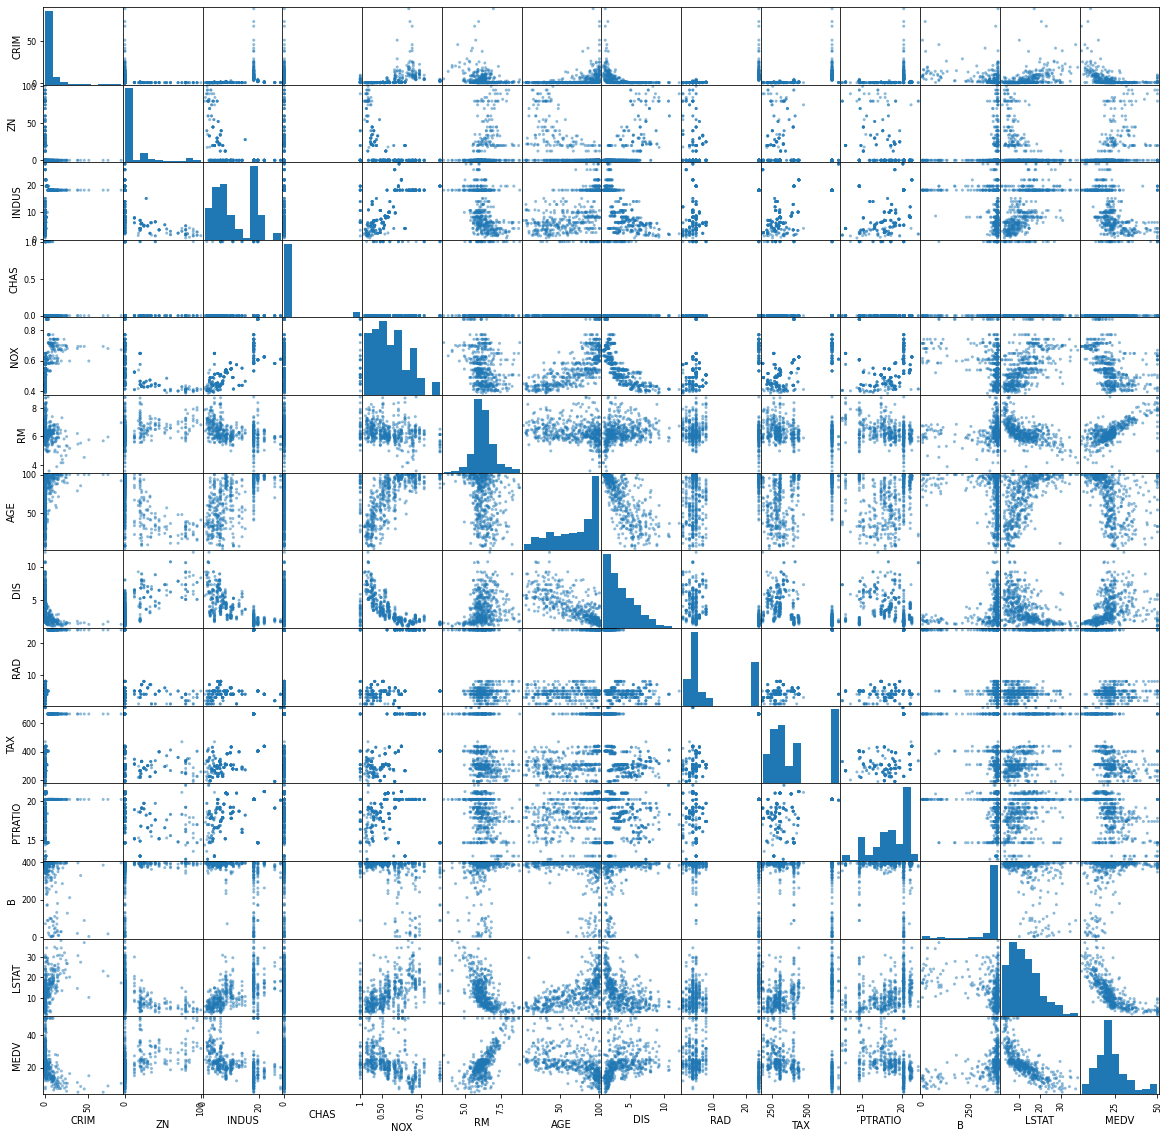

In [656]:
_ = scatter_matrix(data,figsize=(20,20))

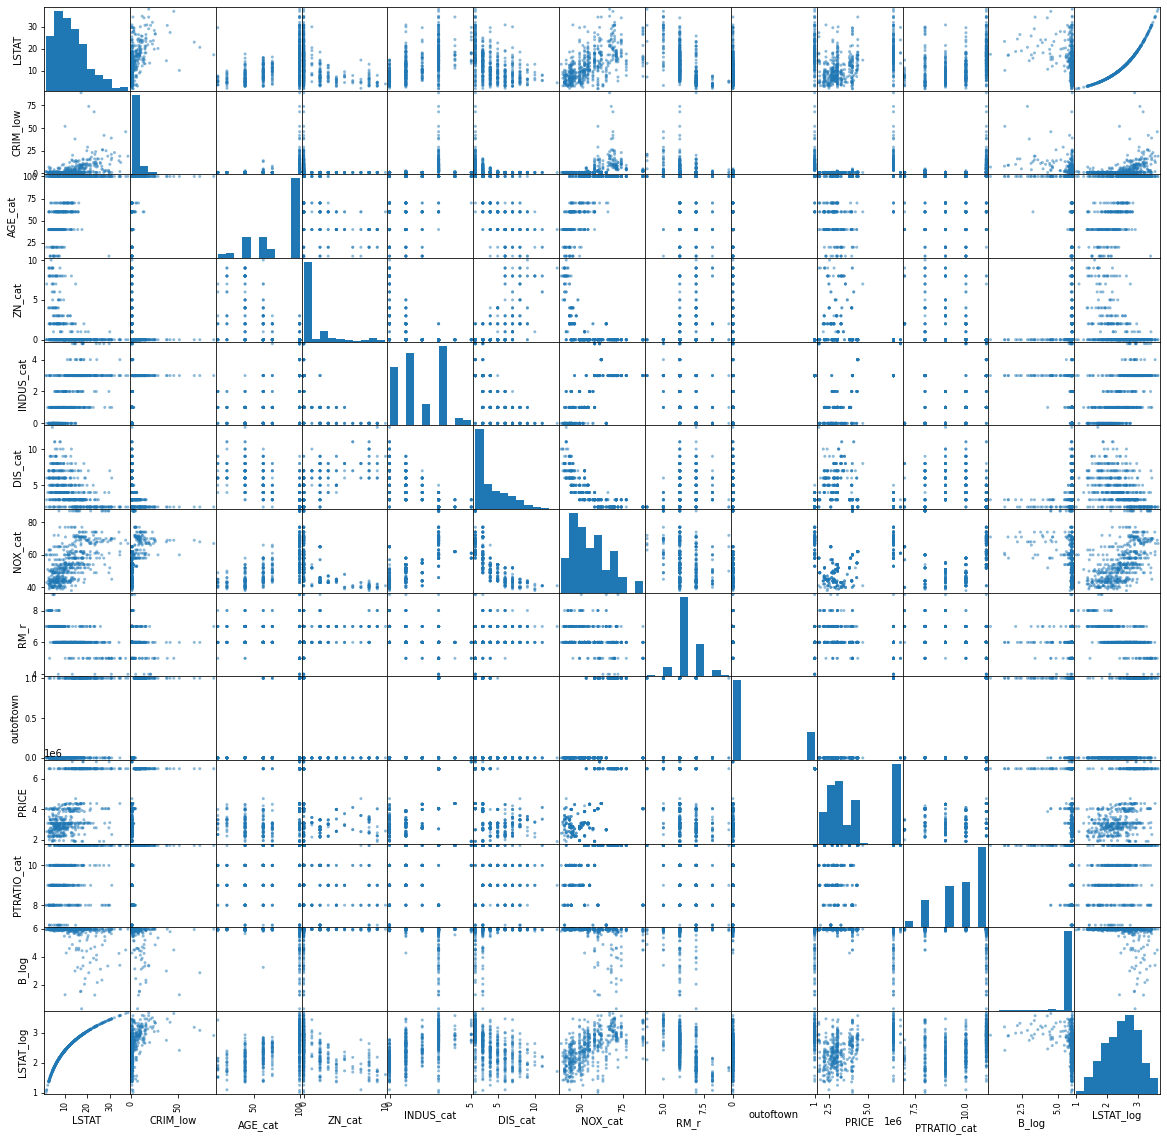

In [657]:
_ = scatter_matrix(X5,figsize=(20,20))